# **General Trends Analysis and Visualization**

### Objectives
- To identify and visualize key trends in the dataset.
- To gain insights into the data distribution and relationships between variables.

### Inputs
- The cleaned and preprocessed dataset.

### Outputs
- Visualizations and reports summarizing the key trends and insights.
- Interactive dashboards for exploring the data.

## Import Libraries and Packages

Loading the necessary libraries and packages for data manipulation and visualization. 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Load the Data
We will need pandas for data manipulation and matplotlib for simple visualizations

Let's load the file as `df`:

In [6]:
df = pd.read_csv("../data/clean/network-intrusions-clean.csv")
print(df.shape)
df.head()

(25192, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,File_Transfer
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Other
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,Other
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Web
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Web


In [54]:
columns = df.columns.tolist()
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'service_category']


## General Trends and Insights from the Data

| Column Name                   | Type         | Description                                                                 |
|-------------------------------|-------------|----------------------------------------------------------------------------|
| duration                      | numeric     | Length of the connection in seconds                                         |
| protocol_type                 | categorical | Type of protocol (TCP, UDP, ICMP)                                          |
| service                        | categorical | Network service on the destination (HTTP, FTP, SMTP, etc.)                 |
| flag                           | categorical | Status flag of the connection (SF, S0, REJ, etc.)                           |
| src_bytes                      | numeric     | Number of bytes sent from source to destination                             |
| dst_bytes                      | numeric     | Number of bytes sent from destination to source                             |
| land                           | binary      | 1 if connection is from/to the same host/port; 0 otherwise                  |
| wrong_fragment                 | numeric     | Number of wrong fragments in the connection                                 |
| urgent                         | numeric     | Number of urgent packets                                                    |
| hot                            | numeric     | Number of “hot” indicators (suspicious activities)                          |
| num_failed_logins              | numeric     | Number of failed login attempts                                             |
| logged_in                      | binary      | 1 if successfully logged in; 0 otherwise                                     |
| num_compromised                | numeric     | Number of compromised conditions in host                                     |
| root_shell                     | binary      | 1 if root shell obtained; 0 otherwise                                        |
| su_attempted                   | binary      | 1 if `su root` command attempted; 0 otherwise                                |
| num_root                       | numeric     | Number of root accesses                                                     |
| num_file_creations             | numeric     | Number of file creation operations                                          |
| num_shells                     | numeric     | Number of shell prompts invoked                                             |
| num_access_files               | numeric     | Number of operations on access control files                                |
| is_guest_login                 | binary      | 1 if login is a guest login; 0 otherwise                                     |
| count                          | numeric     | Number of connections to the same host as the current connection in last 2 sec |
| srv_count                      | numeric     | Number of connections to the same service in last 2 sec                      |
| serror_rate                    | numeric     | % of connections with SYN errors                                            |
| srv_serror_rate                | numeric     | % of connections to same service with SYN errors                             |
| rerror_rate                    | numeric     | % of connections with REJ errors                                            |
| srv_rerror_rate                | numeric     | % of connections to same service with REJ errors                             |
| same_srv_rate                  | numeric     | % of connections to the same service                                        |
| diff_srv_rate                  | numeric     | % of connections to different services                                      |
| srv_diff_host_rate             | numeric     | % of connections to different hosts using the same service                   |
| dst_host_count                 | numeric     | Number of connections to the same destination host                           |
| dst_host_srv_count             | numeric     | Number of connections to the same service on the destination host           |
| dst_host_same_srv_rate         | numeric     | % of connections to same service on the destination host                     |
| dst_host_diff_srv_rate         | numeric     | % of connections to different services on the destination host              |
| dst_host_same_src_port_rate    | numeric     | % of connections from the same source port                                   |
| dst_host_srv_diff_host_rate    | numeric     | % of connections to different hosts using the same service                   |
| dst_host_serror_rate           | numeric     | % of connections to the host with SYN errors                                 |
| dst_host_srv_serror_rate       | numeric     | % of connections to same service on the host with SYN errors                 |
| dst_host_rerror_rate           | numeric     | % of connections to the host with REJ errors                                 |
| dst_host_srv_rerror_rate       | numeric     | % of connections to same service on the host with REJ errors                 |
| class                          | categorical | Label: normal or intrusion type (dos, probe, r2l, u2r)                       |
| service_category               | categorical | General category of the service (ftp, http, smtp, other)                     |


### 1 Attack distribution by type

**Explanation:** 

Using class (specific attack type) to categorize the types of attacks and visualize their distribution.


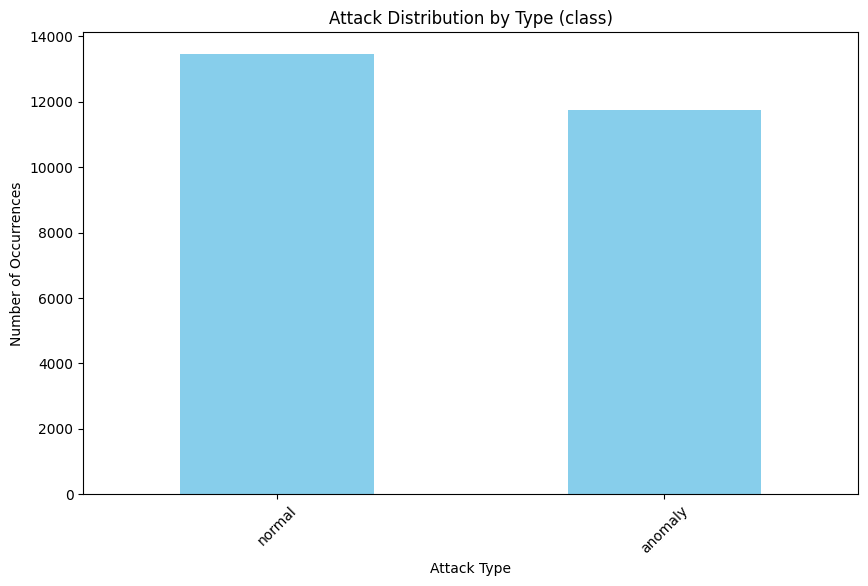

In [20]:
# Count the number of occurrences for each attack type
attack_counts = df['class'].value_counts()

# Bar chart
plt.figure(figsize=(10,6))
attack_counts.plot(kind='bar', color='skyblue')
plt.title('Attack Distribution by Type (class)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


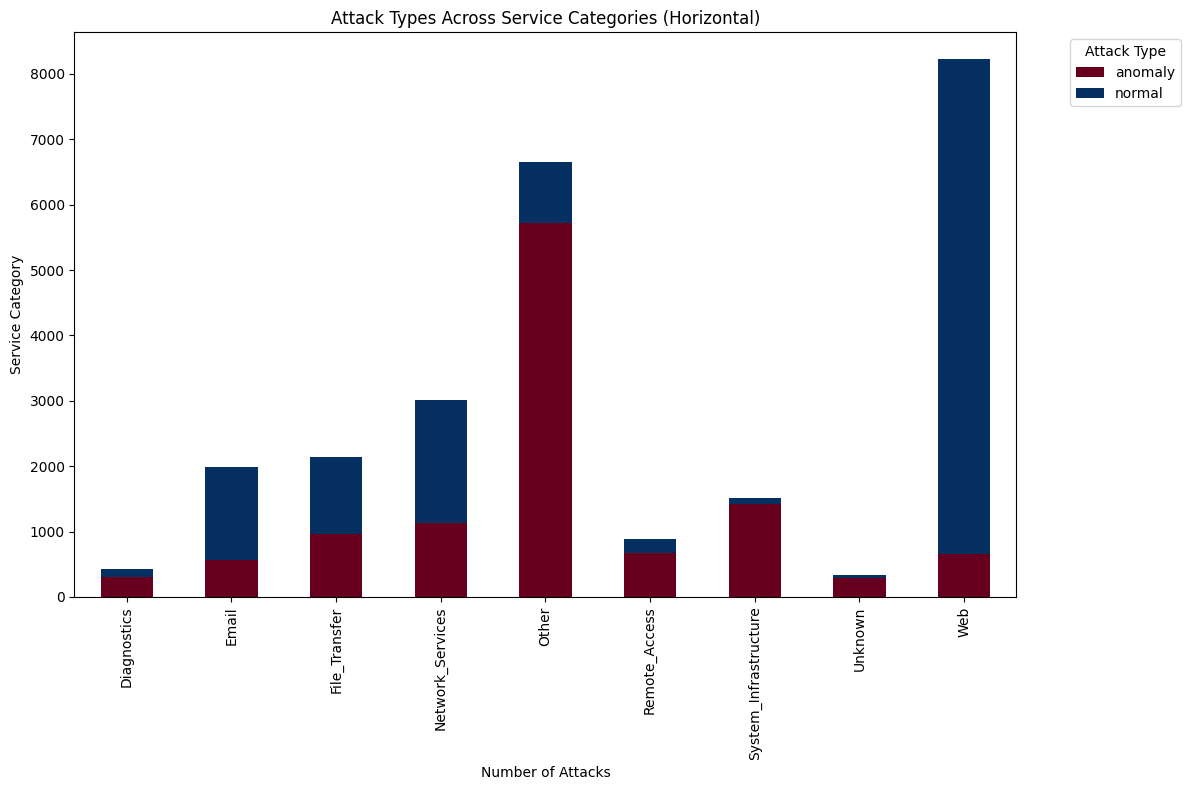

In [41]:



# Create a cross-tab (attack types vs service categories)
attack_service_ct = pd.crosstab(df['service_category'], df['class'])

# Plot horizontal stacked bar chart
attack_service_ct.plot(kind='bar', stacked=True, figsize=(12,8), colormap='RdBu')
plt.title('Attack Types Across Service Categories (Horizontal)')
plt.xlabel('Number of Attacks')
plt.ylabel('Service Category')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:**
- 1. Stacked bar chart provides a clear comparison of the frequency of each attack type. It helps identify which attacks are most prevalent in the dataset.
- 2. Bar chart offers a quick overview of the proportion of each attack type, making it easy to see which attacks dominate the dataset.




Top 10 Network Services Targeted by Attacks

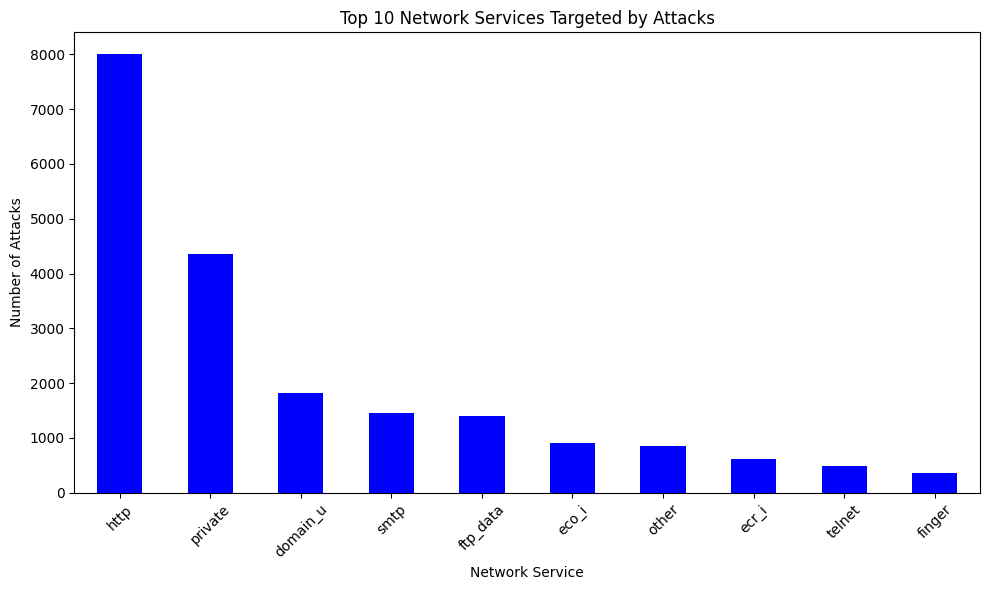

In [46]:
# Top 10 Ten Network Services Targeted by Attacks
top_services = df['service'].value_counts().head(10).index
top_service_df = df[df['service'].isin(top_services)]

top_service_df['service'].value_counts().plot(kind='bar', color='blue', figsize=(10,6))
plt.title('Top 10 Network Services Targeted by Attacks')
plt.xlabel('Network Service')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Protocol and Service Analysis
**Explanation:**
 Identify which protocols or services are targeted more frequently by attacks.

**Visualizations:**
- Bar chart: count of connections per protocol (protocol_type).
- Stacked bar chart: attack vs normal for each protocol.
- Heatmap: protocol × service showing counts of attacks.


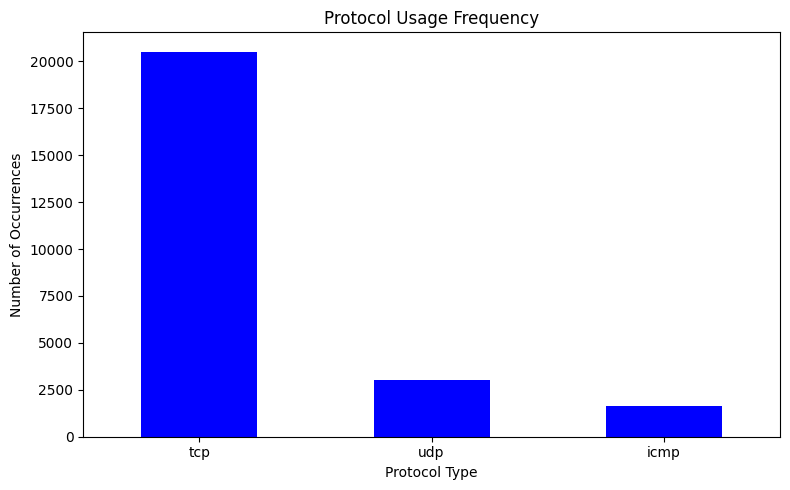

In [48]:
# protocol usage frequency
protocol_counts = df['protocol_type'].value_counts()
protocol_counts.plot(kind='bar', color='Blue', figsize=(8,5))
plt.title('Protocol Usage Frequency')           
plt.xlabel('Protocol Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

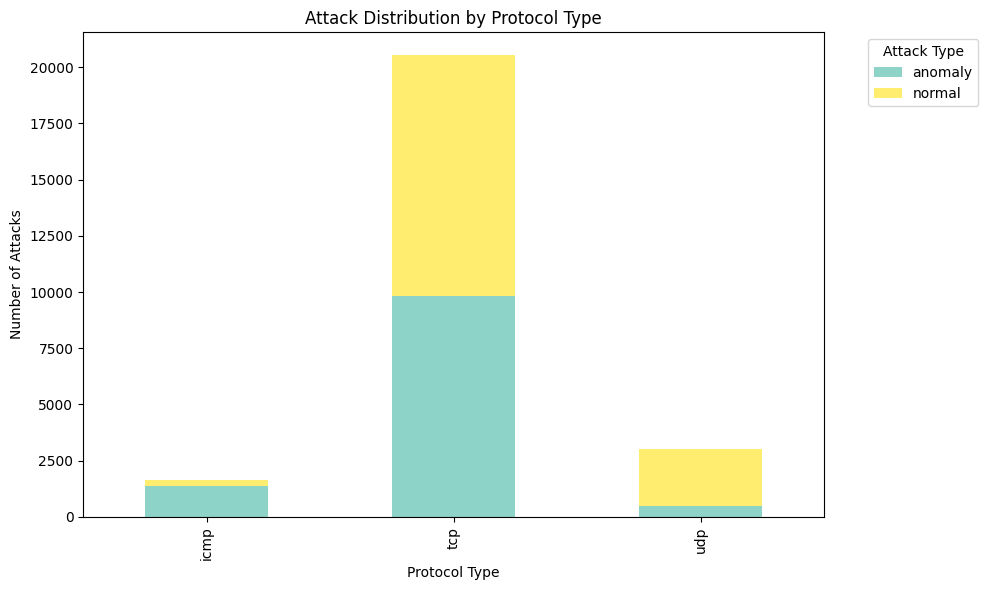

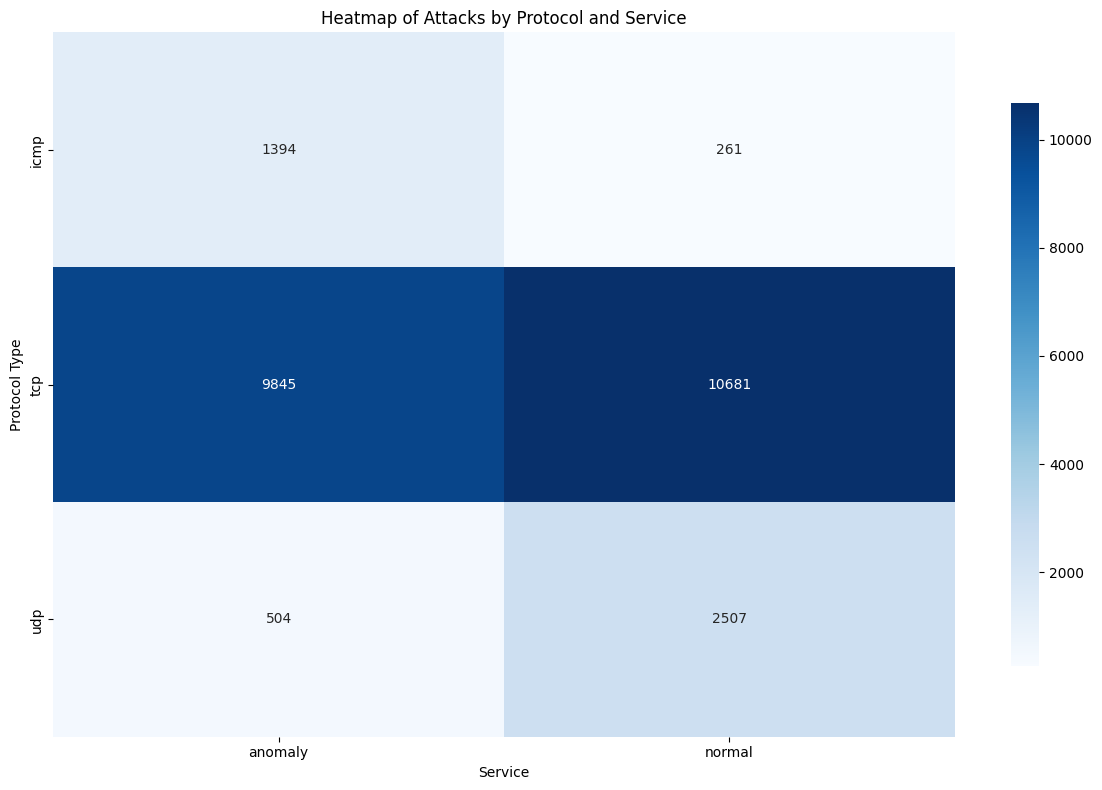

In [57]:
# Identify which protocols or services are targeted more
attack_protocol_ct = pd.crosstab(df['protocol_type'], df['class'])
attack_protocol_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Attack Distribution by Protocol Type')
plt.xlabel('Protocol Type') 
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap: protocol × service showing counts of attacks.
plt.figure(figsize=(12,8))
sns.heatmap(attack_protocol_ct, annot=True, fmt="d", cmap='Blues', cbar_kws={"shrink": .8})
plt.title('Heatmap of Attacks by Protocol and Service')
plt.xlabel('Service')
plt.ylabel('Protocol Type')
plt.tight_layout()
plt.show()

### 3. Traffic Volume Analysis
**Explanation:**
Analyze network traffic patterns, detect anomalies.

**Visualizations:**

- Histograms: distribution of src_bytes and dst_bytes.
- Boxplots: compare traffic for normal vs attack connections.
- Scatter plot: src_bytes vs dst_bytes, colored by class.

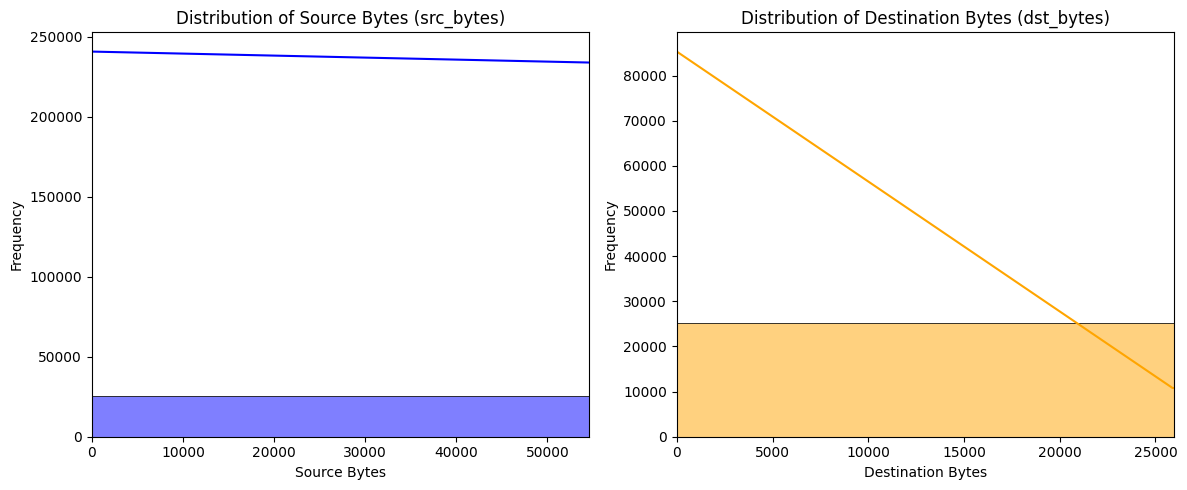

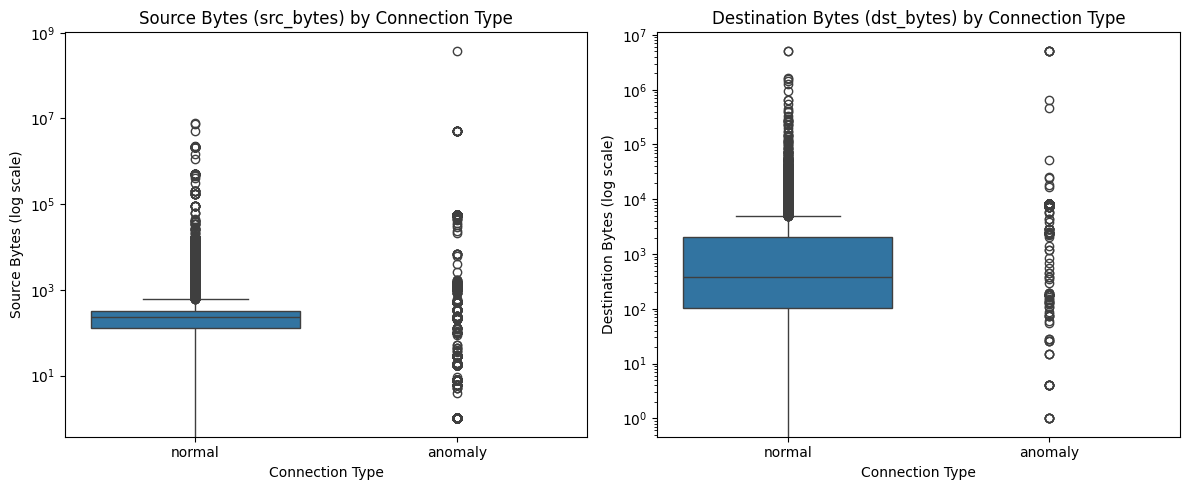

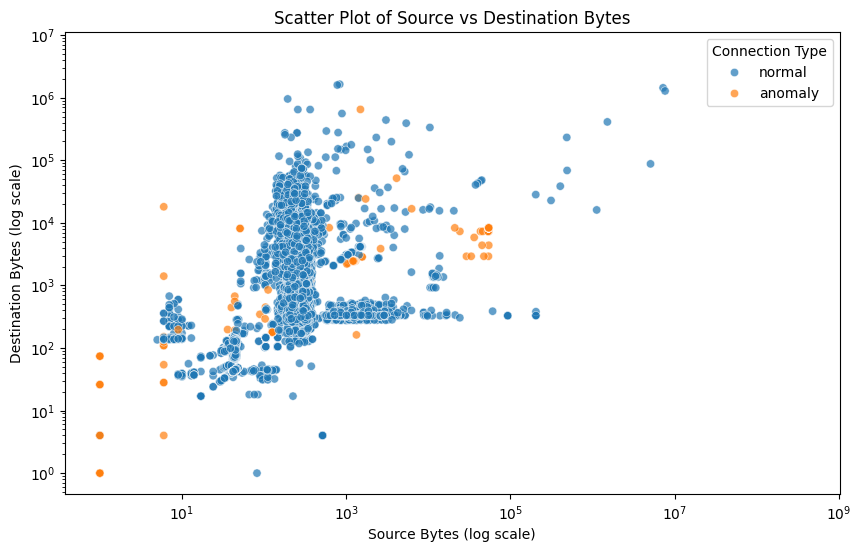

In [60]:
# Histograms: distribution of src_bytes and dst_bytes.

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df['src_bytes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Source Bytes (src_bytes)')
plt.xlabel('Source Bytes')
plt.ylabel('Frequency')
plt.xlim(0, df['src_bytes'].quantile(0.99))  # Limit x-axis to 99th percentile for better visibility
plt.subplot(1, 2, 2)
sns.histplot(df['dst_bytes'], bins=50, kde=True, color='orange')
plt.title('Distribution of Destination Bytes (dst_bytes)')  
plt.xlabel('Destination Bytes')
plt.ylabel('Frequency')
plt.xlim(0, df['dst_bytes'].quantile(0.99))  # Limit x-axis to 99th percentile for better visibility
plt.tight_layout()
plt.show()

# Boxplots: compare traffic for normal vs attack connections
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='src_bytes', data=df)
plt.yscale('log')  # Use log scale for better visibility
plt.title('Source Bytes (src_bytes) by Connection Type')
plt.xlabel('Connection Type')
plt.ylabel('Source Bytes (log scale)')
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dst_bytes', data=df)
plt.yscale('log')  # Use log scale for better visibility
plt.title('Destination Bytes (dst_bytes) by Connection Type')
plt.xlabel('Connection Type')
plt.ylabel('Destination Bytes (log scale)')
plt.tight_layout()
plt.show()

# Scatter plot: src_bytes vs dst_bytes, colored by class.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='src_bytes', y='dst_bytes', hue='class', data=df, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Source vs Destination Bytes')
plt.xlabel('Source Bytes (log scale)')
plt.ylabel('Destination Bytes (log scale)')
plt.legend(title='Connection Type')
plt.show()

### 4. Connection Features & Error Analysis

**Columns:** wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, is_guest_login

**Explanation:** 

Detect anomalies and attacks using unusual connection behavior.

**Visualizations:**

- Heatmap of correlation between numeric features.
- Boxplots or violin plots comparing normal vs attack connections.
- Count plots for binary features (e.g., root_shell, su_attempted).

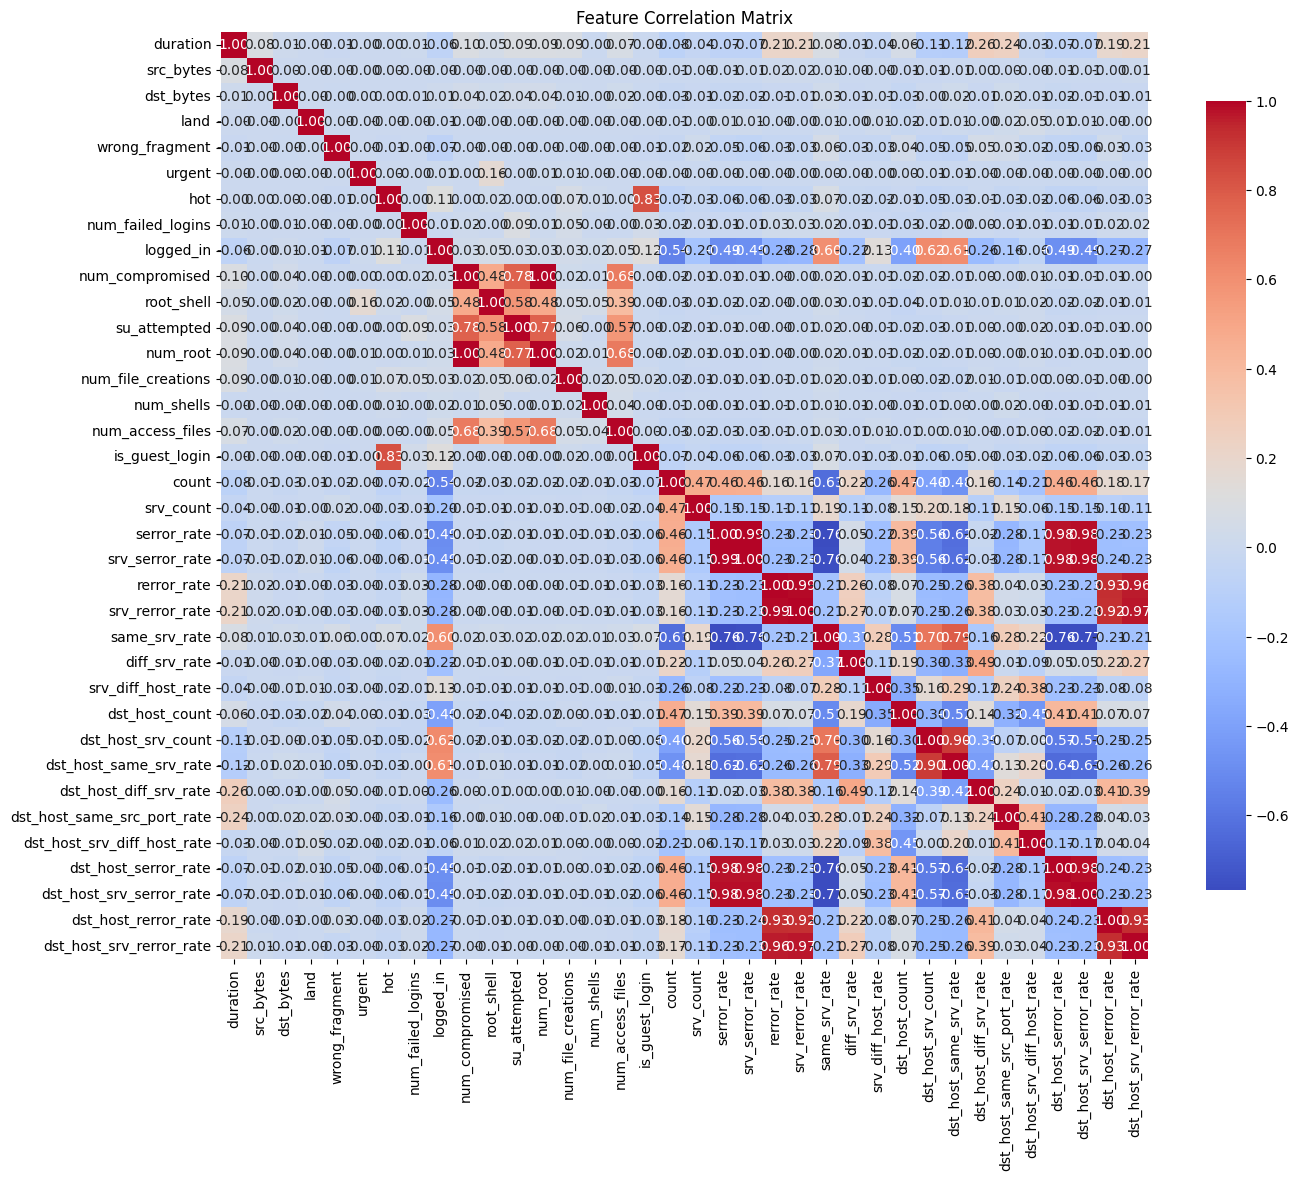

In [56]:
# Overall Feature correlation Analysis numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


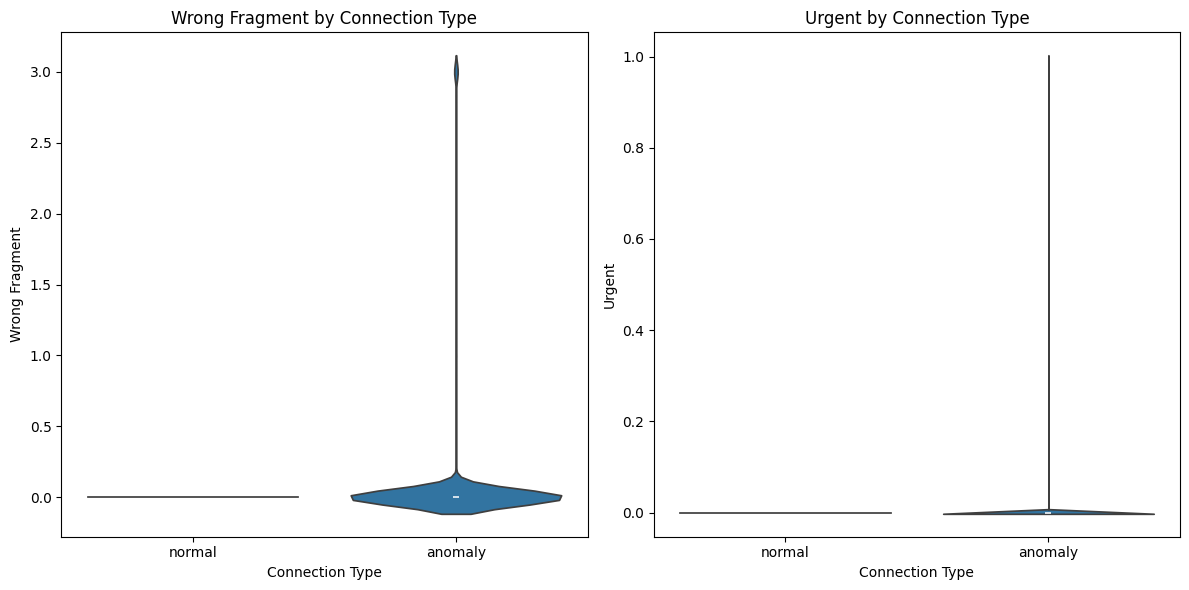

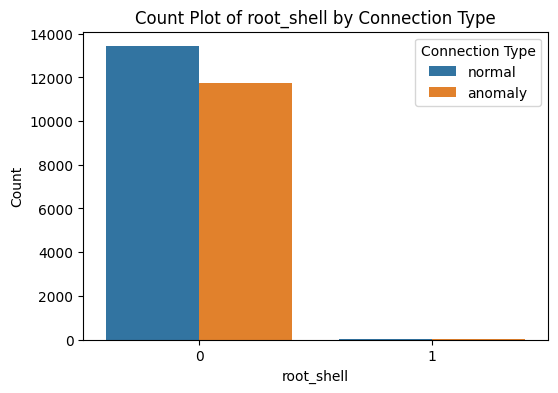

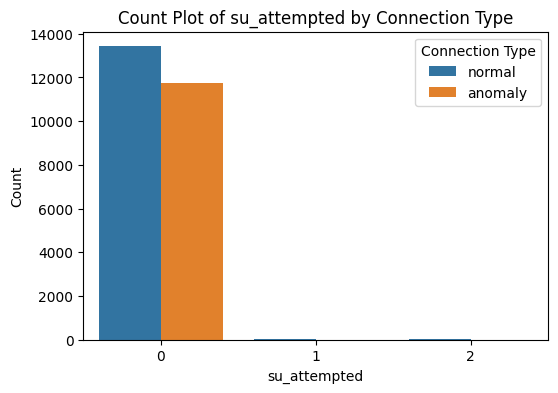

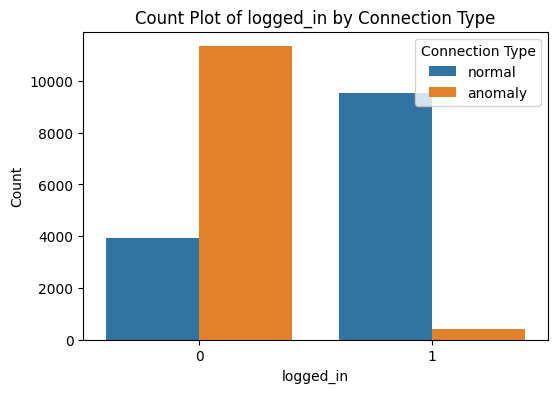

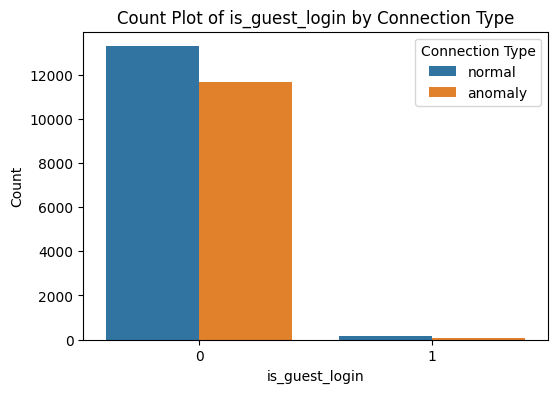

In [ ]:
# Violin plots comparing normal vs attack connections.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='class', y='wrong_fragment', data=df)
plt.title('Wrong Fragment by Connection Type')
plt.xlabel('Connection Type')
plt.ylabel('Wrong Fragment')
plt.subplot(1, 2, 2)
sns.violinplot(x='class', y='urgent', data=df)
plt.title('Urgent by Connection Type')
plt.xlabel('Connection Type')
plt.ylabel('Urgent')
plt.tight_layout()
plt.show()

# Count plot for binary features by connection type

binary_features = ['root_shell', 'su_attempted', 'logged_in', 'is_guest_login']
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='class', data=df)
    plt.title(f'Count Plot of {feature} by Connection Type')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Connection Type')
    plt.show()

### 5. Connection Rate Features

count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate

**Explanation:** 
Identify suspicious patterns in connection rates.

**Visualizations:**

- Histogram or density plots of these features.
- Scatter plots: count vs srv_count, color by attack type.

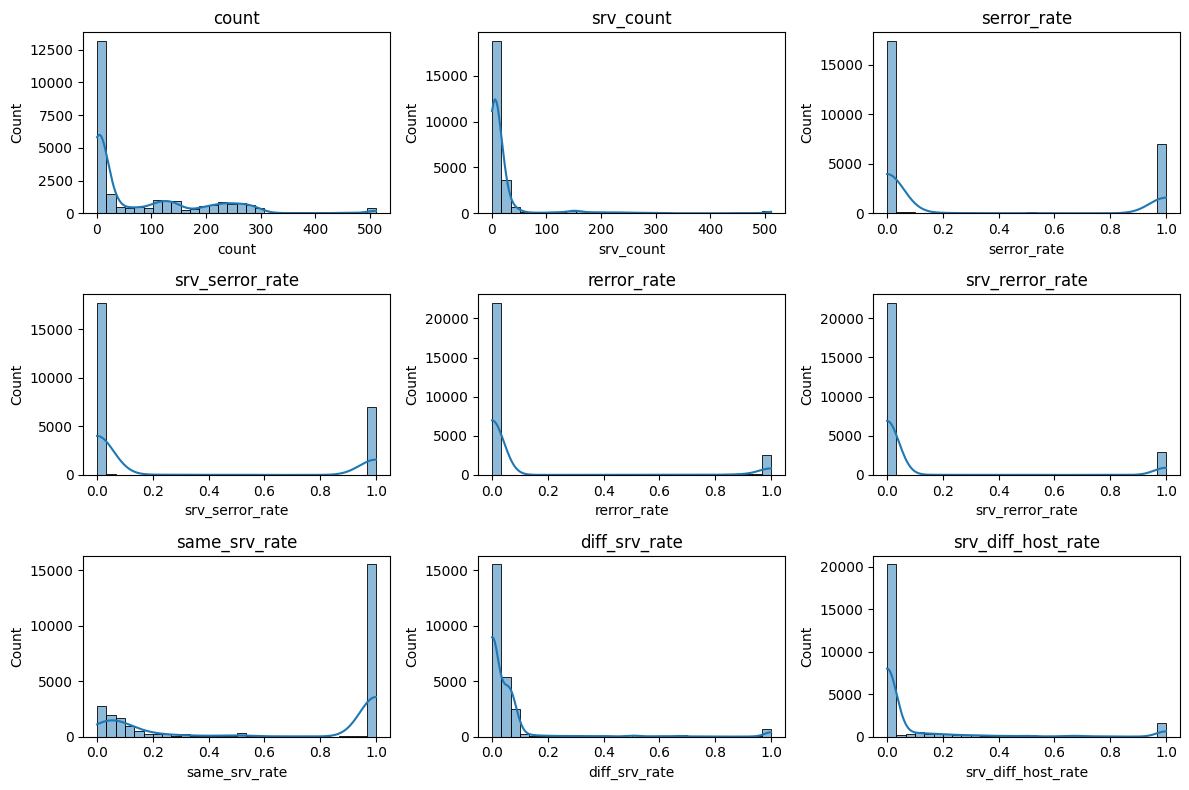

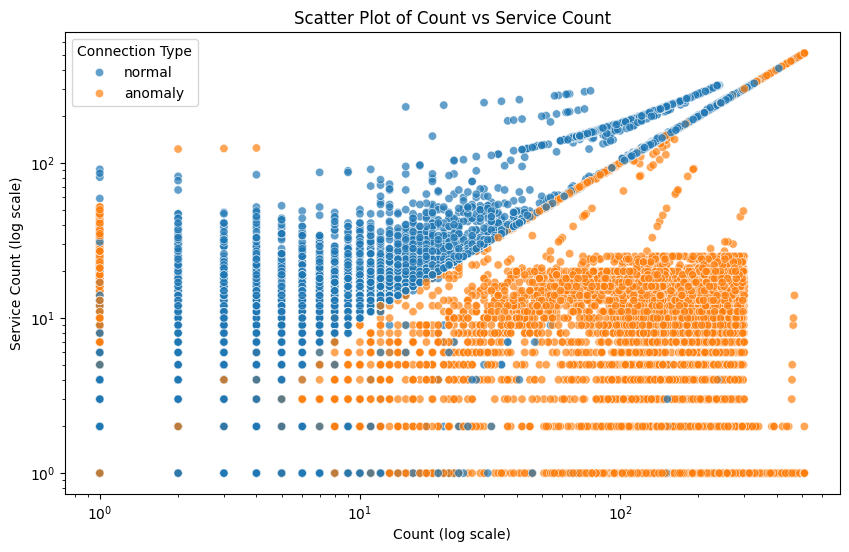

In [65]:
# Histogram or density plots of these features.
plt.figure(figsize=(12, 8))
features = ['count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Scatter plots: count vs srv_count, color by attack type.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='count', y='srv_count', hue='class', data=df, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Count vs Service Count')
plt.xlabel('Count (log scale)')
plt.ylabel('Service Count (log scale)')
plt.legend(title='Connection Type')
plt.show()


### 6. Destination Host Features

 dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate

**Explanation:** Detect hosts under repeated attack.

**Visualizations:**

- Heatmap: correlation among destination host features.
- Boxplots or histograms: compare features for attack vs normal.
- Line plot: cumulative attacks per host (if host info is present).

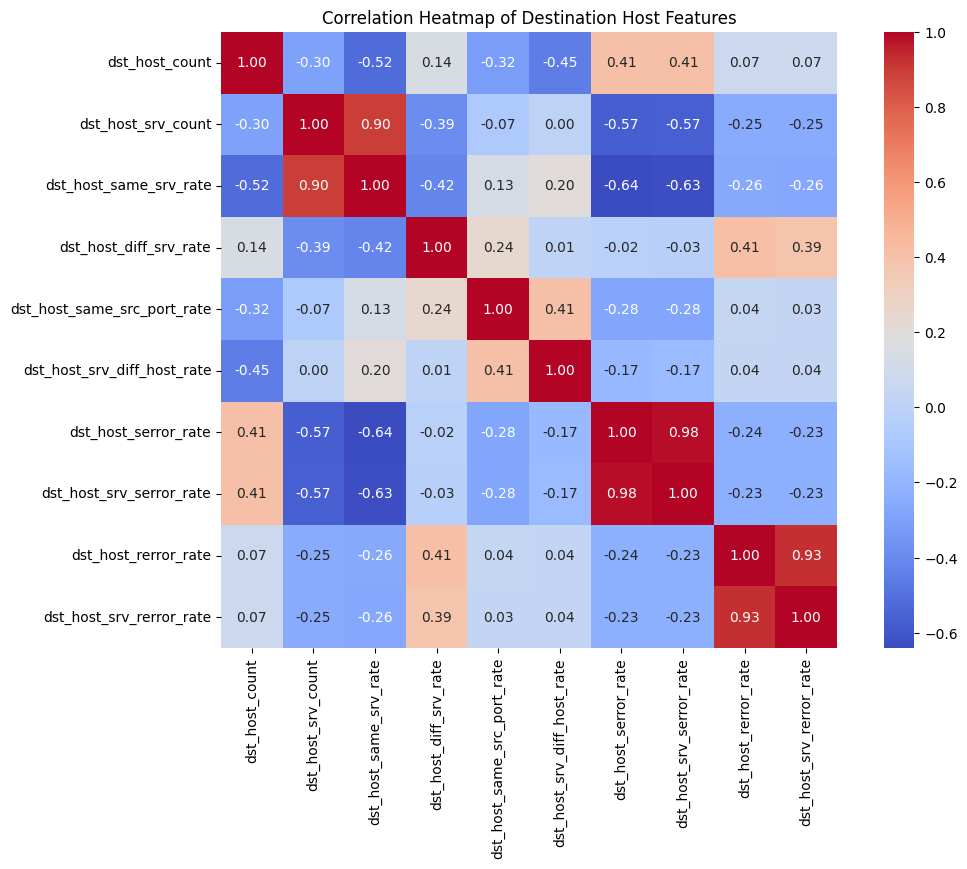

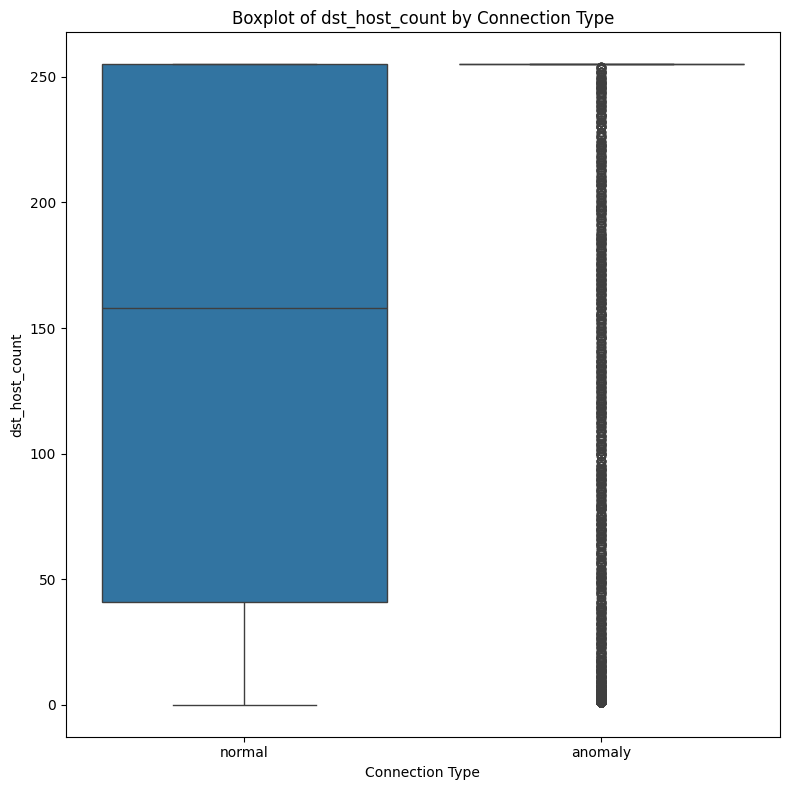

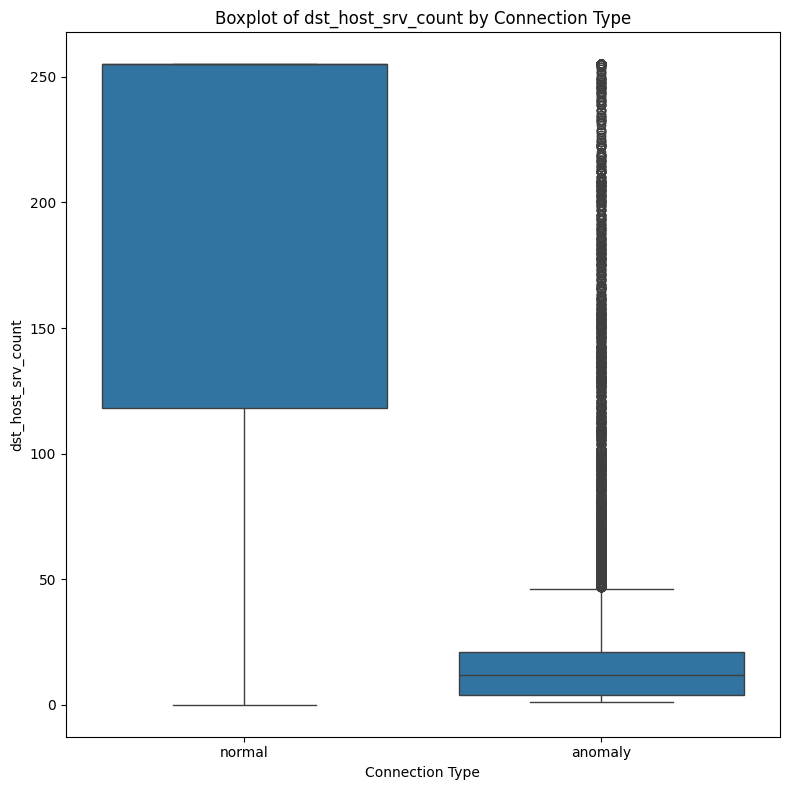

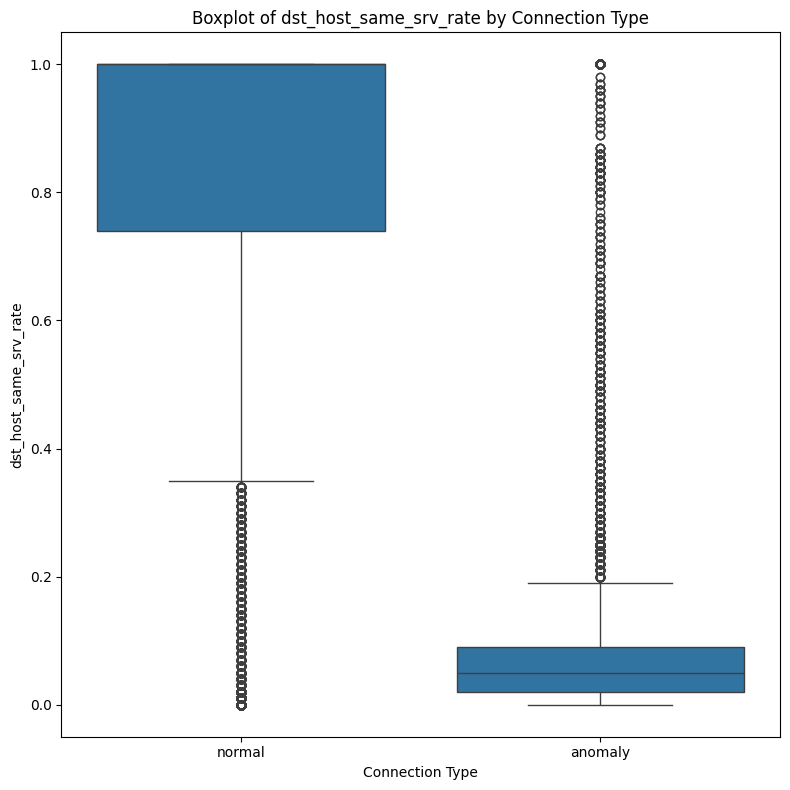

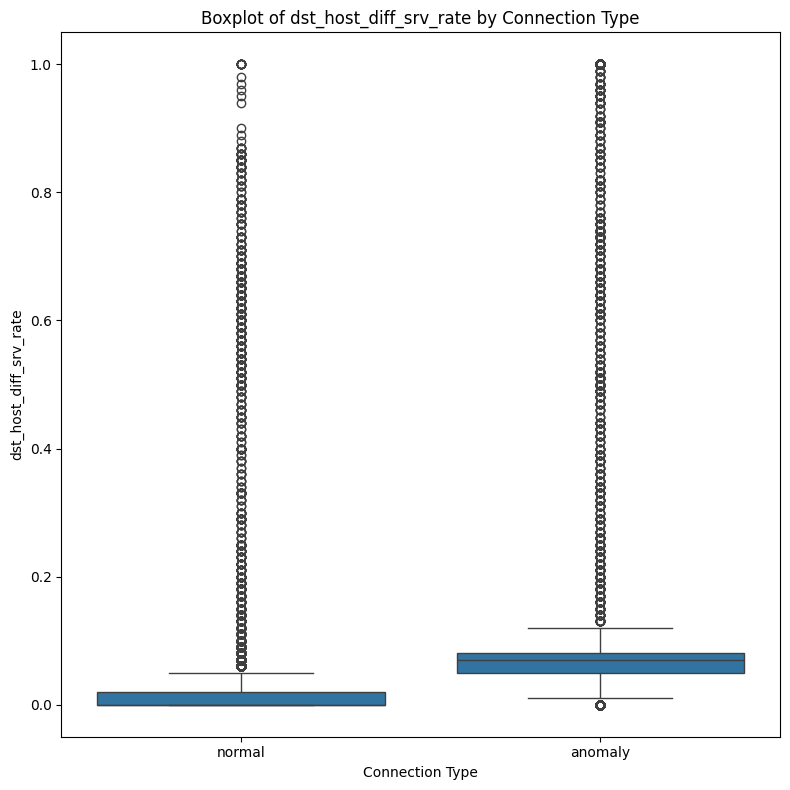

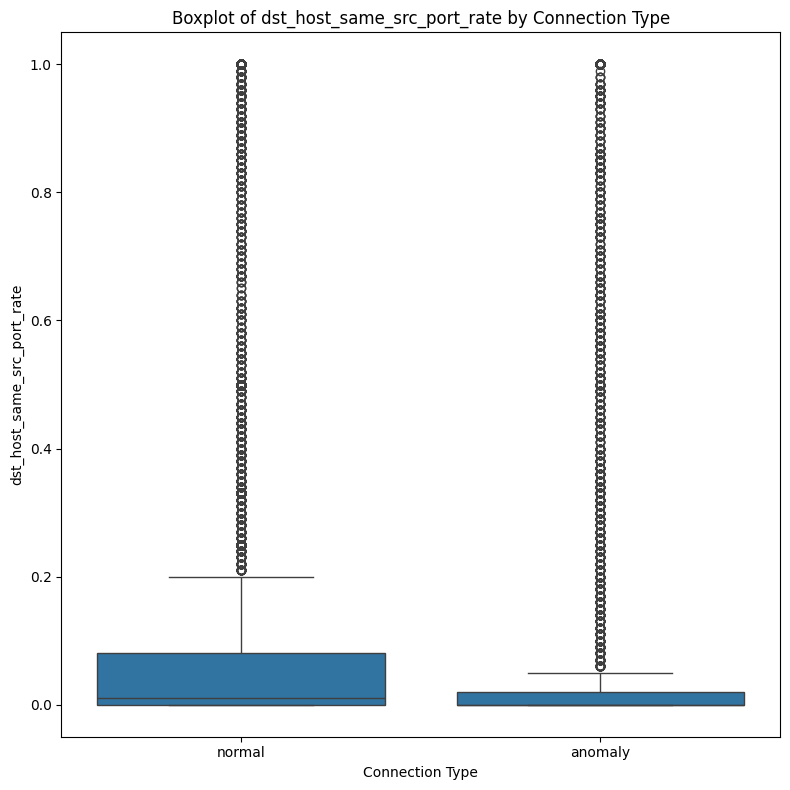

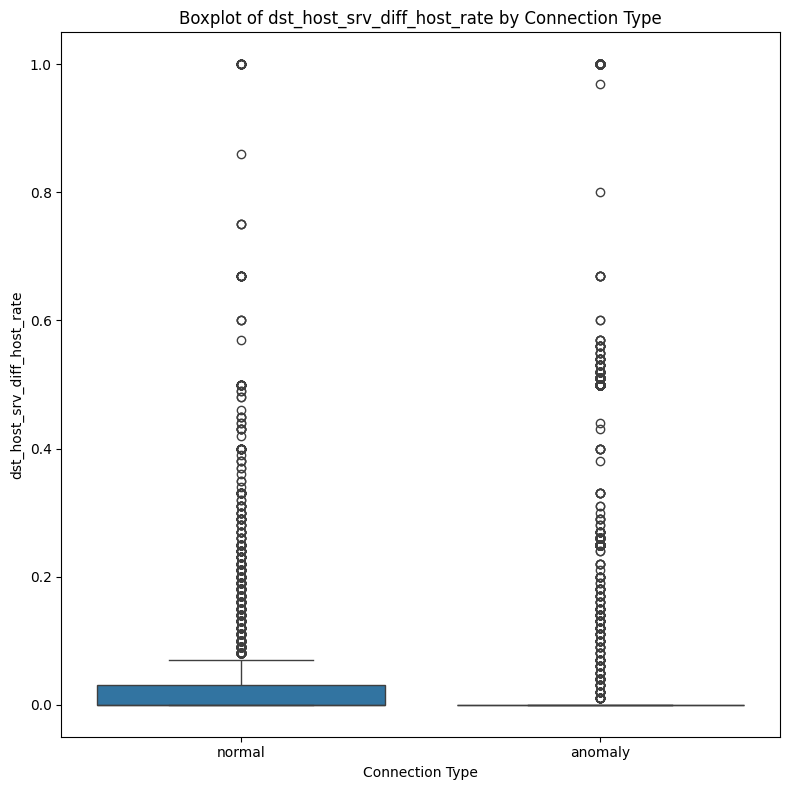

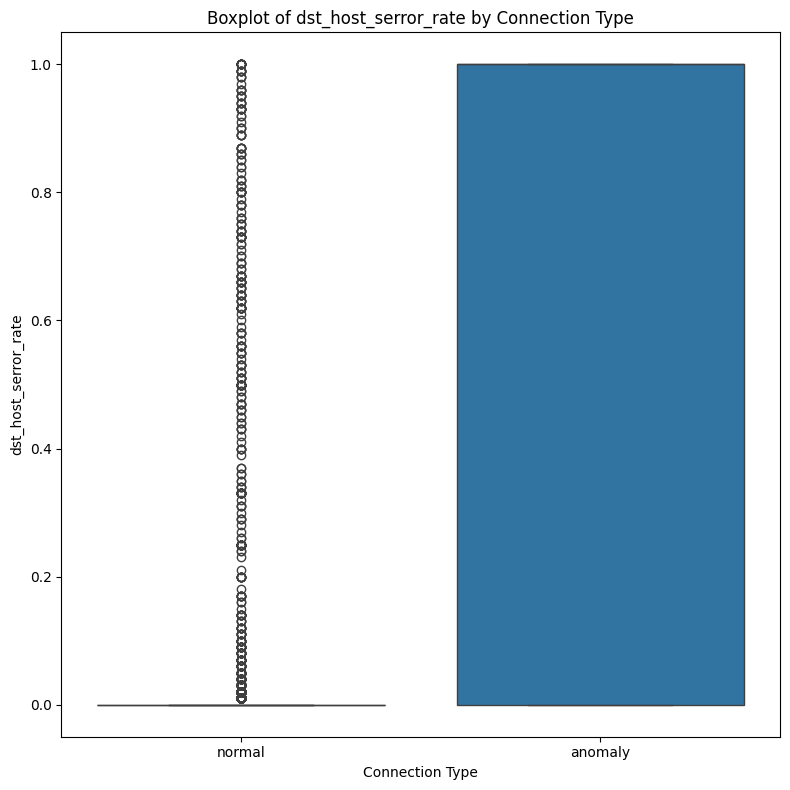

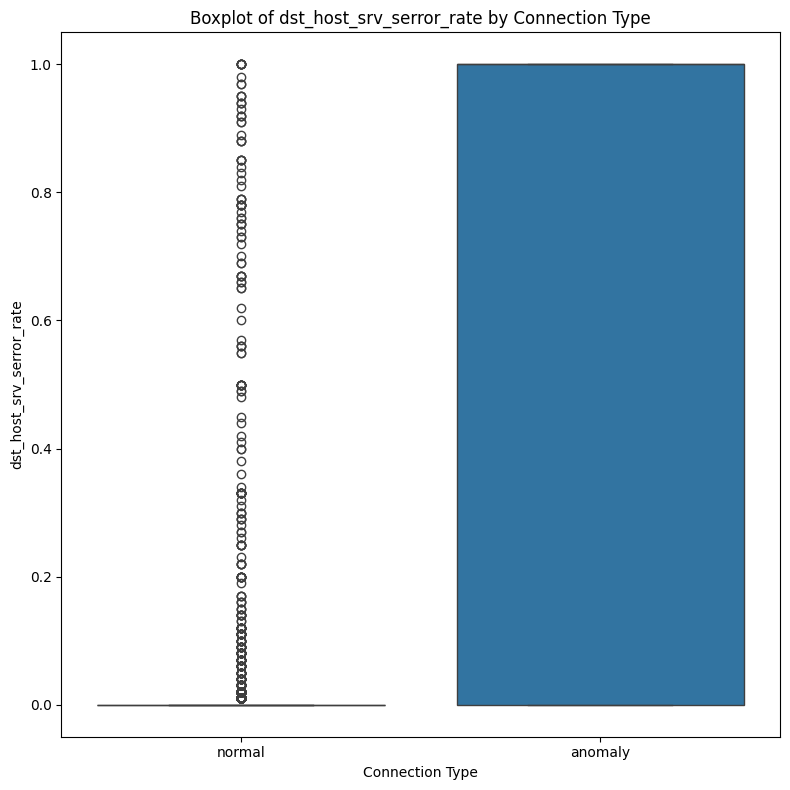

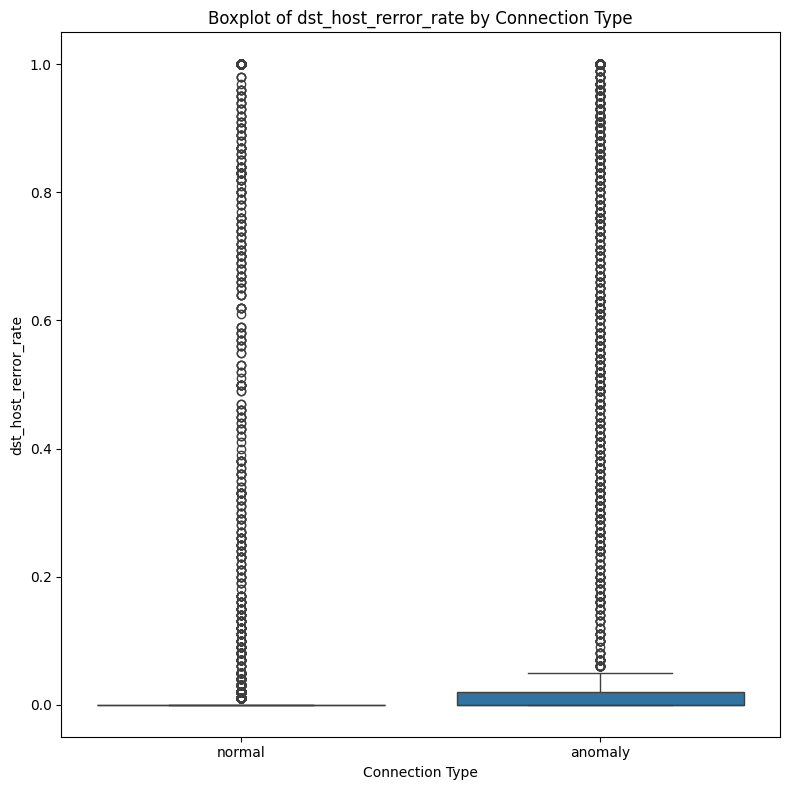

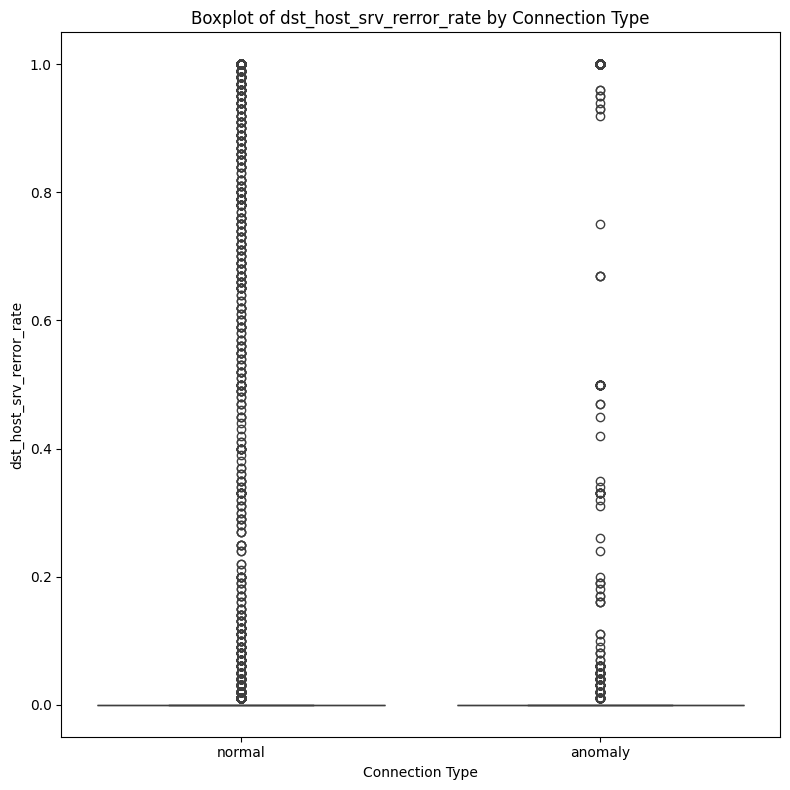

In [73]:
# Heatmap: correlation among destination host features
dest_host_cols = [col for col in numeric_cols if col.startswith('dst_host_')]
dest_host_corr = df[dest_host_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(dest_host_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Destination Host Features")
plt.show()  

# Boxplots or histograms: compare features for attack vs normal.
for feature in dest_host_cols:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Connection Type')
    plt.xlabel('Connection Type')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()